In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('adult 3.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#Filter the document to be able to train it 
data.age.value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [4]:
data.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [5]:
# '?' is a invalid so change it
data['workclass'].replace('?' ,'Others' ,inplace=True)

C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_27456\3237508289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace('?' ,'Others' ,inplace=True)


In [6]:
data.workclass.value_counts()


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
# remove the without-pay and Never-worked data because they are very less and not needed for the modeling
rowsToDrop = data[(data.workclass == 'Without-pay') | (data.workclass == 'Never-worked')].index
data.drop(rowsToDrop , inplace=True)

In [8]:
data.shape

(48811, 15)

In [9]:
data.workclass.value_counts() #Without-Pay , Never-Pay is removed

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64

In [10]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22365
Never-married            16104
Divorced                  6632
Separated                 1530
Widowed                   1517
Married-spouse-absent      626
Married-AF-spouse           37
Name: count, dtype: int64

In [11]:
#Married-AF-spouse is very less so remove it 
data.drop(data[data['marital-status'] == 'Married-AF-spouse'].index , inplace=True)

In [12]:
data.shape

(48774, 15)

In [13]:
data.education.value_counts()

education
HS-grad         15753
Some-college    10864
Bachelors        8019
Masters          2657
Assoc-voc        2059
11th             1809
Assoc-acdm       1597
10th             1386
7th-8th           952
Prof-school       833
9th               756
12th              657
Doctorate         593
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [14]:
data.drop('education' , axis=1 , inplace=True)

In [15]:
data.shape

(48774, 14)

In [16]:
data.occupation.value_counts()

occupation
Prof-specialty       6168
Craft-repair         6107
Exec-managerial      6082
Adm-clerical         5602
Sales                5498
Other-service        4916
Machine-op-inspct    3019
?                    2794
Transport-moving     2353
Handlers-cleaners    2069
Farming-fishing      1481
Tech-support         1446
Protective-serv       982
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [17]:
data.occupation.replace('?' , 'Unknown' , inplace=True)

C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_27456\124579924.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace('?' , 'Unknown' , inplace=True)


In [18]:
data.occupation.value_counts()

occupation
Prof-specialty       6168
Craft-repair         6107
Exec-managerial      6082
Adm-clerical         5602
Sales                5498
Other-service        4916
Machine-op-inspct    3019
Unknown              2794
Transport-moving     2353
Handlers-cleaners    2069
Farming-fishing      1481
Tech-support         1446
Protective-serv       982
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [19]:
#Armed-forces is very less so remove it
data.drop(data[data['occupation'] == 'Armed-Forces'].index , inplace=True)

In [20]:
data.occupation.value_counts()

occupation
Prof-specialty       6168
Craft-repair         6107
Exec-managerial      6082
Adm-clerical         5602
Sales                5498
Other-service        4916
Machine-op-inspct    3019
Unknown              2794
Transport-moving     2353
Handlers-cleaners    2069
Farming-fishing      1481
Tech-support         1446
Protective-serv       982
Priv-house-serv       242
Name: count, dtype: int64

In [21]:
data.relationship.value_counts()

relationship
Husband           19690
Not-in-family     12577
Own-child          7563
Unmarried          5123
Wife               2304
Other-relative     1502
Name: count, dtype: int64

In [22]:
data.race.value_counts()

race
White                 41690
Black                  4677
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      469
Other                   406
Name: count, dtype: int64

In [23]:
data['native-country'].value_counts()
data['native-country'].replace('?' , 'Other' , inplace=True)

C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_27456\1546123565.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native-country'].replace('?' , 'Other' , inplace=True)


In [24]:
data['native-country'].value_counts()

native-country
United-States                 43752
Mexico                          951
Other                           856
Philippines                     293
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [25]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Unknown,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
data.workclass.value_counts()

workclass
Private             33882
Self-emp-not-inc     3859
Local-gov            3136
Others               2794
State-gov            1979
Self-emp-inc         1695
Federal-gov          1414
Name: count, dtype: int64

In [27]:
data['native-country'].value_counts()

native-country
United-States                 43752
Mexico                          951
Other                           856
Philippines                     293
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [28]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [29]:
data.age.value_counts()

age
36    1348
33    1335
35    1335
23    1324
31    1323
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [30]:
# remove outliers 
data = data[data.age < 75]
data = data[data.age > 18]

In [31]:
data.age.value_counts()

age
36    1348
33    1335
35    1335
23    1324
31    1323
34    1301
37    1280
28    1278
30    1270
38    1263
32    1250
41    1235
27    1228
29    1218
39    1204
24    1202
25    1195
40    1186
22    1176
42    1164
26    1149
20    1111
43    1103
45    1096
46    1095
21    1095
47    1080
44    1066
19    1047
51     876
50     865
49     847
48     845
52     736
53     711
55     621
54     613
56     564
58     554
57     551
59     523
61     450
60     449
62     392
64     339
63     335
65     282
67     237
66     237
68     177
69     149
70     133
72     119
71     118
73     108
74      76
Name: count, dtype: int64

In [32]:
#remove the fnlwgt col cause it is not contributing to any prediction 
data.drop('fnlwgt' , axis=1 , inplace=True)

In [33]:
data.shape

(46864, 13)

In [34]:
data.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [35]:
data.workclass.value_counts()


workclass
Private             32617
Self-emp-not-inc     3745
Local-gov            3072
Others               2426
State-gov            1959
Self-emp-inc         1642
Federal-gov          1403
Name: count, dtype: int64

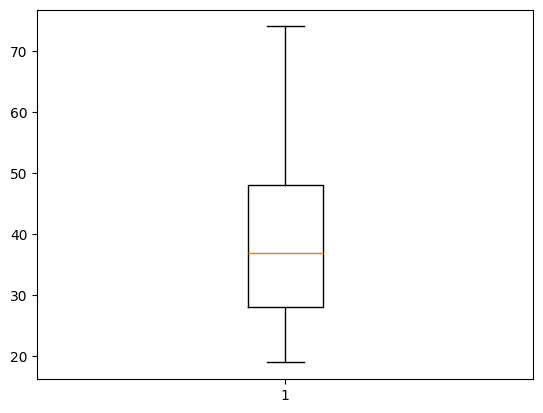

In [36]:
plt.boxplot(data['age'])
plt.show()

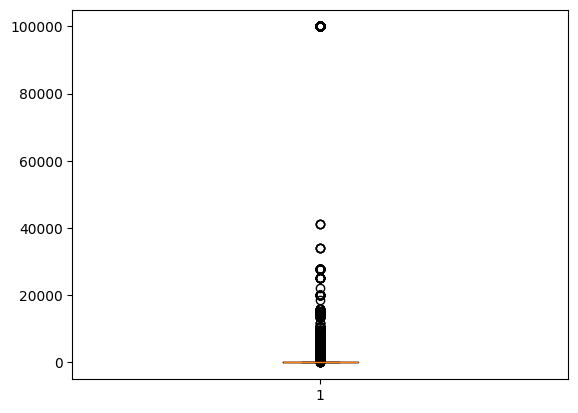

In [37]:
plt.boxplot(data['capital-gain'])
plt.show()

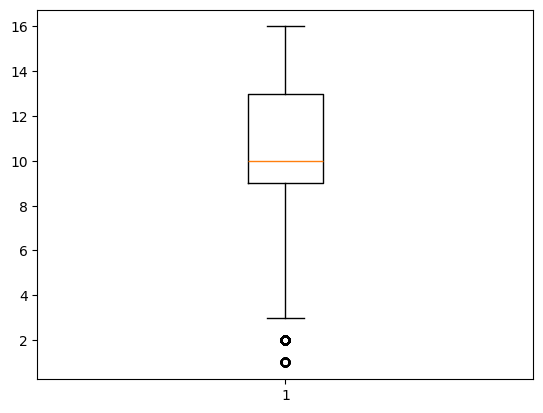

In [38]:
plt.boxplot(data['educational-num'])
plt.show()

In [39]:
data = data[data['educational-num'] >= 5]

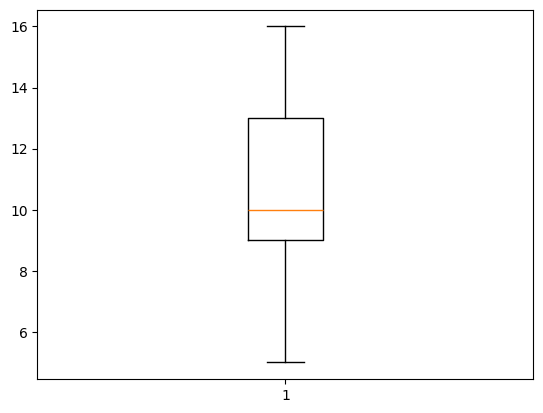

In [40]:
plt.boxplot(data['educational-num'])
plt.show()

# Now the lebel encodeing is needed

In [41]:
data.columns


Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder

# Create separate encoders for each column
workclass_encoder = LabelEncoder()
marital_encoder = LabelEncoder()
occupation_encoder = LabelEncoder()
relationship_encoder = LabelEncoder()
race_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
country_encoder = LabelEncoder()

# Encode each column and store the encoder
data['workclass'] = workclass_encoder.fit_transform(data['workclass'])
data['marital-status'] = marital_encoder.fit_transform(data['marital-status'])
data['occupation'] = occupation_encoder.fit_transform(data['occupation'])
data['relationship'] = relationship_encoder.fit_transform(data['relationship'])
data['race'] = race_encoder.fit_transform(data['race'])
data['gender'] = gender_encoder.fit_transform(data['gender'])
data['native-country'] = country_encoder.fit_transform(data['native-country'])

# Display the mapping for each column
print("Workclass mapping:")
for i, category in enumerate(workclass_encoder.classes_):
    print(f"{i}: {category}")

print("\nMarital status mapping:")
for i, category in enumerate(marital_encoder.classes_):
    print(f"{i}: {category}")

# Repeat for other columns as needed
print("\nGender mapping:")
for i, category in enumerate(gender_encoder.classes_):
    print(f"{i}: {category}")

print("\nOccupation mapping")
for i , category in enumerate(occupation_encoder.classes_):
    print(f"{i}: {category}")

print("\nRelationship mapping")
for i , category in enumerate(relationship_encoder.classes_):
    print(f"{i}: {category}")

print("\nrace encoding")
for i , category in enumerate(race_encoder.classes_):
    print(f"{i}: {category}")

print("\nNative-country mapping")
for i , category in enumerate(country_encoder.classes_):
    print(f"{i}: {category}")

Workclass mapping:
0: Federal-gov
1: Local-gov
2: Others
3: Private
4: Self-emp-inc
5: Self-emp-not-inc
6: State-gov

Marital status mapping:
0: Divorced
1: Married-civ-spouse
2: Married-spouse-absent
3: Never-married
4: Separated
5: Widowed

Gender mapping:
0: Female
1: Male

Occupation mapping
0: Adm-clerical
1: Craft-repair
2: Exec-managerial
3: Farming-fishing
4: Handlers-cleaners
5: Machine-op-inspct
6: Other-service
7: Priv-house-serv
8: Prof-specialty
9: Protective-serv
10: Sales
11: Tech-support
12: Transport-moving
13: Unknown

Relationship mapping
0: Husband
1: Not-in-family
2: Other-relative
3: Own-child
4: Unmarried
5: Wife

race encoding
0: Amer-Indian-Eskimo
1: Asian-Pac-Islander
2: Black
3: Other
4: White

Native-country mapping
0: Cambodia
1: Canada
2: China
3: Columbia
4: Cuba
5: Dominican-Republic
6: Ecuador
7: El-Salvador
8: England
9: France
10: Germany
11: Greece
12: Guatemala
13: Haiti
14: Holand-Netherlands
15: Honduras
16: Hong
17: Hungary
18: India
19: Iran
20:

In [43]:
data

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,7,3,5,3,2,1,0,0,40,39,<=50K
1,38,3,9,1,3,0,4,1,0,0,50,39,<=50K
2,28,1,12,1,9,0,4,1,0,0,40,39,>50K
3,44,3,10,1,5,0,2,1,7688,0,40,39,>50K
5,34,3,6,3,6,1,4,1,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,12,1,11,5,4,0,0,0,38,39,<=50K
48838,40,3,9,1,5,0,4,1,0,0,40,39,>50K
48839,58,3,9,5,0,4,4,0,0,0,40,39,<=50K
48840,22,3,9,3,0,3,4,1,0,0,20,39,<=50K


## Now separate the input and the output

In [44]:
y = data['income']
x = data.drop(columns=['income'])


## Test different Ml Algorithms

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = {}

# Train and test each model using pipeline
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8176
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      6711
        >50K       0.71      0.48      0.58      2323

    accuracy                           0.82      9034
   macro avg       0.78      0.71      0.73      9034
weighted avg       0.81      0.82      0.80      9034

Decision Tree Accuracy: 0.8067
              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      6711
        >50K       0.63      0.62      0.62      2323

    accuracy                           0.81      9034
   macro avg       0.75      0.75      0.75      9034
weighted avg       0.81      0.81      0.81      9034

Random Forest Accuracy: 0.8468
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      6711
        >50K       0.73      0.65      0.68      2323

    accuracy                           0.85      9034
   macro avg       0.80      

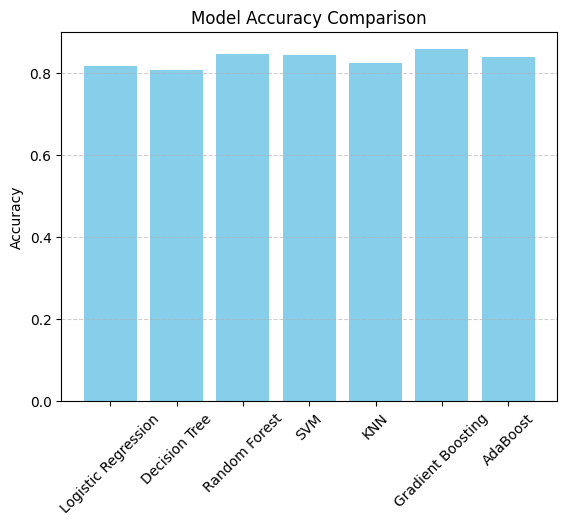

In [46]:
plt.bar(results.keys() , results.values() , color = 'skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y' , linestyle='--' , alpha=0.6)
plt.show()


In [48]:
import joblib

best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', models[best_model_name])
])
best_model.fit(x_train, y_train)

joblib.dump(best_model, "best_model_pipeline.pkl")
print("Best model pipeline saved as best_model_pipeline.pkl")

Best Model: Gradient Boosting with Accuracy: 0.8581
Best model pipeline saved as best_model_pipeline.pkl


In [47]:
data.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

# Create a Streamlit App

In [50]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

st.set_page_config(page_title="Employee Salary Prediction", layout="centered")
st.title("Employee Salary Prediction App")
st.write("Enter employee details to predict if their salary is above or below $50K per year.")

@st.cache_resource
def load_model():
    return joblib.load("best_model_pipeline.pkl")

pipeline = load_model()

# Mappings as per your label encoding
workclass_mapping = {
    "Federal-gov": 0,
    "Local-gov": 1,
    "Others": 2,
    "Private": 3,
    "Self-emp-inc": 4,
    "Self-emp-not-inc": 5,
    "State-gov": 6
}
marital_mapping = {
    "Divorced": 0,
    "Married-civ-spouse": 1,
    "Married-spouse-absent": 2,
    "Never-married": 3,
    "Separated": 4,
    "Widowed": 5
}
gender_mapping = {
    "Female": 0,
    "Male": 1
}
occupation_mapping = {
    "Adm-clerical": 0,
    "Craft-repair": 1,
    "Exec-managerial": 2,
    "Farming-fishing": 3,
    "Handlers-cleaners": 4,
    "Machine-op-inspct": 5,
    "Other-service": 6,
    "Priv-house-serv": 7,
    "Prof-specialty": 8,
    "Protective-serv": 9,
    "Sales": 10,
    "Tech-support": 11,
    "Transport-moving": 12,
    "Unknown": 13
}
relationship_mapping = {
    "Husband": 0,
    "Not-in-family": 1,
    "Other-relative": 2,
    "Own-child": 3,
    "Unmarried": 4,
    "Wife": 5
}
race_mapping = {
    "Amer-Indian-Eskimo": 0,
    "Asian-Pac-Islander": 1,
    "Black": 2,
    "Other": 3,
    "White": 4
}
country_mapping = {
    "Cambodia": 0, "Canada": 1, "China": 2, "Columbia": 3, "Cuba": 4, "Dominican-Republic": 5,
    "Ecuador": 6, "El-Salvador": 7, "England": 8, "France": 9, "Germany": 10, "Greece": 11,
    "Guatemala": 12, "Haiti": 13, "Holand-Netherlands": 14, "Honduras": 15, "Hong": 16,
    "Hungary": 17, "India": 18, "Iran": 19, "Ireland": 20, "Italy": 21, "Jamaica": 22,
    "Japan": 23, "Laos": 24, "Mexico": 25, "Nicaragua": 26, "Other": 27,
    "Outlying-US(Guam-USVI-etc)": 28, "Peru": 29, "Philippines": 30, "Poland": 31,
    "Portugal": 32, "Puerto-Rico": 33, "Scotland": 34, "South": 35, "Taiwan": 36,
    "Thailand": 37, "Trinadad&Tobago": 38, "United-States": 39, "Vietnam": 40, "Yugoslavia": 41
}

with st.form("input_form"):
    col1, col2 = st.columns(2)
    with col1:
        age = st.slider("Age", 18, 75, 30)
        gender = st.selectbox("Gender", list(gender_mapping.keys()))
        race = st.selectbox("Race", list(race_mapping.keys()))
        native_country = st.selectbox("Native Country", list(country_mapping.keys()), index=39)
        educational_num = st.slider("Education Level (5-16)", 5, 16, 10)
    with col2:
        workclass = st.selectbox("Work Class", list(workclass_mapping.keys()))
        hours_per_week = st.slider("Hours per Week", 1, 99, 40)
        occupation = st.selectbox("Occupation", list(occupation_mapping.keys()))
        marital_status = st.selectbox("Marital Status", list(marital_mapping.keys()))
        relationship = st.selectbox("Relationship", list(relationship_mapping.keys()))
        capital_gain = st.slider("Capital Gain ($)", 0, 20000, 0, step=1000)
        capital_loss = st.slider("Capital Loss ($)", 0, 5000, 0, step=100)

    submitted = st.form_submit_button("Predict Salary")

if submitted:
    input_df = pd.DataFrame({
        'age': [age],
        'workclass': [workclass_mapping[workclass]],
        'marital-status': [marital_mapping[marital_status]],
        'occupation': [occupation_mapping[occupation]],
        'relationship': [relationship_mapping[relationship]],
        'race': [race_mapping[race]],
        'gender': [gender_mapping[gender]],
        'native-country': [country_mapping[native_country]],
        'educational-num': [educational_num],
        'capital-gain': [capital_gain],
        'capital-loss': [capital_loss],
        'hours-per-week': [hours_per_week]
    })
    prediction = pipeline.predict(input_df.values)
    if prediction[0] == 1:
        st.success("Prediction: Income > $50K per year")
    else:
        st.info("Prediction: Income ≤ $50K per year")

st.markdown("---")
st.caption("Created by Abhisek Das")

Overwriting app.py


In [ ]:
!streamlit run app.py